In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Dataset A

In [3]:
header_data_path = '/content/drive/MyDrive/Dataset/Header_Data/new_header.csv'

header_data = pd.read_csv(header_data_path)

header_data.head()

,url,Content-Security-Policy,Strict-Transport-Security,X-XSS-Protection,X-Frame-Options,X-Content-Type-Options,Referrer-Policy,Expect-CT,Cross-Origin-Opener-Policy,Public-Key-Pins,...,Access-Control-Allow-Origin,Using IP,Symbol,Redirecting,HTTPS,Anchor URL,Website Traffic,Long URL,Short URL,label
0,https://www.avondale.edu.au,0,0,0,1,0,1,0,1,0,...,0,0,1,1,1,-1,0,1,0,1
1,https://www.dissertationwriting-service.com,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,-1,0,1,0,1
2,https://www.intoxalock.com,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,-1,0,1,0,1
3,https://www.famous-scientists.ru,0,0,0,0,0,0,0,0,0,...,0,0,1,-1,1,-1,0,1,0,1
4,https://www.enjoyburlington.com,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,-1,0,1,0,1


In [4]:
header_data.shape

(60173, 26)

In [5]:
header_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60173 entries, 0 to 60172
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   url                            60173 non-null  object
 1   Content-Security-Policy        60173 non-null  int64 
 2   Strict-Transport-Security      60173 non-null  int64 
 3   X-XSS-Protection               60173 non-null  int64 
 4   X-Frame-Options                60173 non-null  int64 
 5   X-Content-Type-Options         60173 non-null  int64 
 6   Referrer-Policy                60173 non-null  int64 
 7   Expect-CT                      60173 non-null  int64 
 8   Cross-Origin-Opener-Policy     60173 non-null  int64 
 9   Public-Key-Pins                60173 non-null  int64 
 10  X-AspNetMvc-Version            60173 non-null  int64 
 11  Federated-Learning-Of-Cohorts  60173 non-null  int64 
 12  X-DNS-Prefetch-Control         60173 non-null  int64 
 13  C

In [6]:
header_data.nunique()

url                              53490
Content-Security-Policy              2
Strict-Transport-Security            2
X-XSS-Protection                     2
X-Frame-Options                      2
X-Content-Type-Options               2
Referrer-Policy                      2
Expect-CT                            2
Cross-Origin-Opener-Policy           2
Public-Key-Pins                      2
X-AspNetMvc-Version                  2
Federated-Learning-Of-Cohorts        1
X-DNS-Prefetch-Control               2
Cross-Origin-Resource-Policy         2
Cross-Origin-Embedder-Policy         2
Content-Type                         2
Access-Control-Allow-Origin          2
Using IP                             1
Symbol                               2
Redirecting                          3
HTTPS                                2
Anchor URL                           3
Website Traffic                      2
Long URL                             3
Short URL                            2
label                    

In [7]:
header_data.columns

Index(['url', 'Content-Security-Policy', 'Strict-Transport-Security',
       'X-XSS-Protection', 'X-Frame-Options', 'X-Content-Type-Options',
       'Referrer-Policy', 'Expect-CT', 'Cross-Origin-Opener-Policy',
       'Public-Key-Pins', 'X-AspNetMvc-Version',
       'Federated-Learning-Of-Cohorts', 'X-DNS-Prefetch-Control',
       'Cross-Origin-Resource-Policy', 'Cross-Origin-Embedder-Policy',
       'Content-Type', 'Access-Control-Allow-Origin', 'Using IP', 'Symbol',
       'Redirecting', 'HTTPS', 'Anchor URL', 'Website Traffic', 'Long URL',
       'Short URL', 'label'],
      dtype='object')

In [8]:
header_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Content-Security-Policy,60173.0,0.147541,0.354648,0.0,0.0,0.0,0.0,1.0
Strict-Transport-Security,60173.0,0.285826,0.451811,0.0,0.0,0.0,1.0,1.0
X-XSS-Protection,60173.0,0.174148,0.379240,0.0,0.0,0.0,0.0,1.0
X-Frame-Options,60173.0,0.275888,0.446964,0.0,0.0,0.0,1.0,1.0
X-Content-Type-Options,60173.0,0.260383,0.438847,0.0,0.0,0.0,1.0,1.0
Referrer-Policy,60173.0,0.157047,0.363848,0.0,0.0,0.0,0.0,1.0
Expect-CT,60173.0,0.003806,0.061573,0.0,0.0,0.0,0.0,1.0
Cross-Origin-Opener-Policy,60173.0,0.017865,0.132462,0.0,0.0,0.0,0.0,1.0
Public-Key-Pins,60173.0,0.000233,0.015252,0.0,0.0,0.0,0.0,1.0
X-AspNetMvc-Version,60173.0,0.006880,0.082662,0.0,0.0,0.0,0.0,1.0


###Encoding URL

In [9]:
from sklearn.preprocessing import LabelEncoder

if header_data['url'].dtype == 'object':
  label = LabelEncoder()
  label.fit(list(header_data['url'].values))
  header_data['url'] = label.transform(list(header_data['url'].values))

In [10]:
header_data['url'].head()

0    24930
1    29393
2    35486
3    31054
4    30493
Name: url, dtype: int64

###Distribution of Features

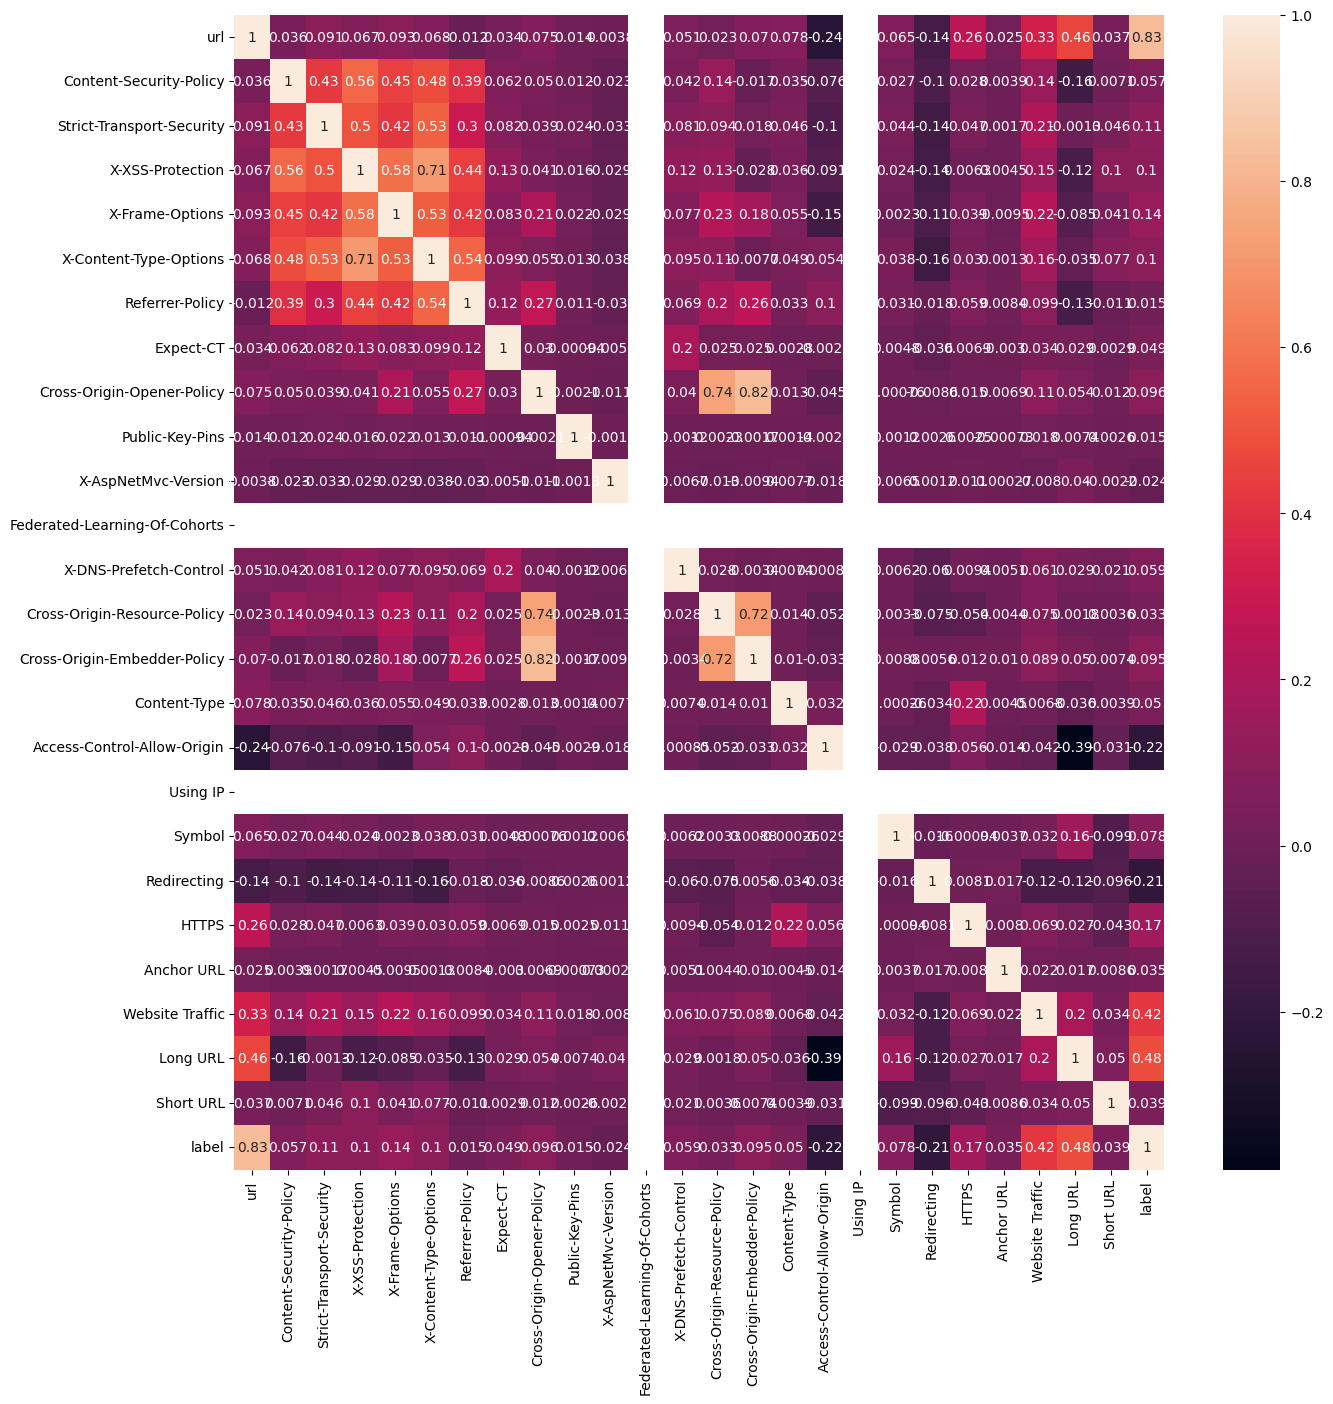

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(header_data.corr(), annot = True)
plt.show()

From the above heatmap, we can see that 2 features, 'Federated Learning if Cohorts' and 'Using IP' do not contribute to determine that the website is indeed Phishing or nor.

We can chose to skip those columns for better Accuracy/Metrics

###'Label' Column Information

In [12]:
header_data['label'].value_counts()

-1    30179
 1    29994
Name: label, dtype: int64

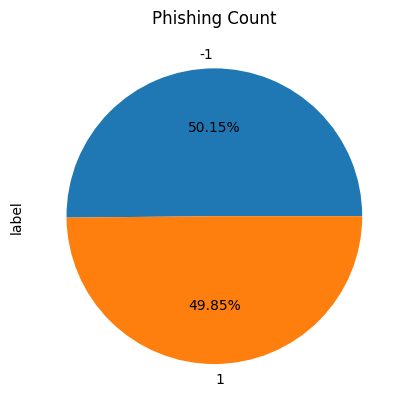

In [13]:
header_data['label'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Phishing Count')
plt.show()

###Assigning Dependent and Independent Variables

In [14]:
X = header_data.drop(['Federated-Learning-Of-Cohorts', 'Using IP', 'label'], axis = 1)
#X = header_data.drop(['label'], axis = 1)
#X = header_data.drop(['url','Using IP', 'Symbol', 'Redirecting', 'HTTPS', 'Anchor URL', 'Website Traffic', 'Long URL', 'Short URL', 'label'], axis = 1)
y = header_data['label']

###Applying K-fold cross validation to avoid Overfitting

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits = 10, shuffle = True)

In [16]:
score = cross_val_score(RandomForestClassifier(n_estimators=10), X, y, cv=cv)

In [17]:
print('Cross Validation Scores are {}'.format(score))
print('Average Corss Validation Score :{}'.format(score.mean()))

Cross Validation Scores are [0.99451645 0.9963443  0.99435028 0.99650989 0.99501413 0.99584511
 0.99518032 0.99484793 0.99434934 0.99484793]
Average Corss Validation Score :0.9951805682061897


###Seperating Training and Test Set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42121, 23), (42121,), (18052, 23), (18052,))

###Model Design

In [19]:
model = RandomForestClassifier(n_estimators=10)

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [21]:
y_train_forest = model.predict(X_train)
y_test_forest = model.predict(X_test)

###Performance on Data - Dataset A

In [49]:
print("Dataset A")
print()

##Accuracy
acc_train_forest = metrics.accuracy_score(y_train, y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test, y_test_forest)

print("Random Forest: Accuracy on Training Data: {:.3f}".format(acc_train_forest * 100))
print("Random Forest: Accuracy on Test Data: {:.3f}".format(acc_test_forest * 100))
print()

##F1 Score
f1_score_train_forest = metrics.f1_score(y_train, y_train_forest, average = 'micro')
f1_score_test_forest = metrics.f1_score(y_test, y_test_forest, average='micro')

print("Random Forest: F1 Sccore on Training Data: {:.3f}".format(f1_score_train_forest * 100))
print("Random Forest: F1 Score on Test Data: {:.3f}".format(f1_score_test_forest * 100))
print()

##Recall
recall_score_train = metrics.recall_score(y_train, y_train_forest)
recall_score_test = metrics.recall_score(y_test, y_test_forest)

print("Random Forest: Recall on Training Data: {:.3f}".format(recall_score_train * 100))
print("Random Forest: Recall on Test Data: {:.3f}".format(recall_score_test * 100))
print()

##Precision
precision_score_train_forest = metrics.precision_score(y_train, y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test, y_test_forest)

print("Random Forest: Precision on Training Data: {:.3f}".format(precision_score_train_forest * 100))
print("Random Forest: Precision on Test Data: {:.3f}".format(precision_score_test_forest * 100))

Dataset A

Random Forest: Accuracy on Training Data: 99.936
Random Forest: Accuracy on Test Data: 99.352

Random Forest: F1 Sccore on Training Data: 99.936
Random Forest: F1 Score on Test Data: 99.352

Random Forest: Recall on Training Data: 99.924
Random Forest: Recall on Test Data: 99.249

Random Forest: Precision on Training Data: 99.947
Random Forest: Precision on Test Data: 99.458


In [23]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      8992
           1       0.99      0.99      0.99      9060

    accuracy                           0.99     18052
   macro avg       0.99      0.99      0.99     18052
weighted avg       0.99      0.99      0.99     18052



##Testing on new Phishing Data - Dataset B

In [24]:
test_data_path = '/content/drive/MyDrive/Dataset/Header_Data/phishing_test.csv'

test_data = pd.read_csv(test_data_path)

test_data.head()

,url,Content-Security-Policy,Strict-Transport-Security,X-XSS-Protection,X-Frame-Options,X-Content-Type-Options,Referrer-Policy,Expect-CT,Cross-Origin-Opener-Policy,Public-Key-Pins,...,Access-Control-Allow-Origin,Using IP,Symbol,Redirecting,HTTPS,Anchor URL,Website Traffic,Long URL,Short URL,label
0,https://lbkn4a.webwave.dev/,1,0,0,1,0,0,0,0,0,...,1,0,1,1,1,-1,0,1,0,-1
1,https://cpnfr5.webwave.dev/,1,0,0,1,0,0,0,0,0,...,1,0,1,1,1,-1,0,1,0,-1
2,https://docs.google.com/presentation/d/e/2PACX...,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,-1,0,-1,0,-1
3,https://new.express.adobe.com/webpage/WfubpM5z...,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,-1,0,1,0,-1
4,https://pub-fd64d7c28cd04a1baba8927daad1a552.r...,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,-1,0,0,0,-1


In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9785 entries, 0 to 9784
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   url                            9785 non-null   object
 1   Content-Security-Policy        9785 non-null   int64 
 2   Strict-Transport-Security      9785 non-null   int64 
 3   X-XSS-Protection               9785 non-null   int64 
 4   X-Frame-Options                9785 non-null   int64 
 5   X-Content-Type-Options         9785 non-null   int64 
 6   Referrer-Policy                9785 non-null   int64 
 7   Expect-CT                      9785 non-null   int64 
 8   Cross-Origin-Opener-Policy     9785 non-null   int64 
 9   Public-Key-Pins                9785 non-null   int64 
 10  X-AspNetMvc-Version            9785 non-null   int64 
 11  Federated-Learning-Of-Cohorts  9785 non-null   int64 
 12  X-DNS-Prefetch-Control         9785 non-null   int64 
 13  Cro

In [26]:
if test_data['url'].dtype == 'object':
  label = LabelEncoder()
  label.fit(list(test_data['url'].values))
  test_data['url'] = label.transform(list(test_data['url'].values))

In [27]:
test_data['url'].head()

0    6736
1    4385
2    4733
3    7191
4    8141
Name: url, dtype: int64

In [28]:
X_test_1 = test_data.drop(['Federated-Learning-Of-Cohorts', 'Using IP', 'label'], axis = 1)
y_test_1 = test_data['label']

In [51]:
predict_test = model.predict(X_test_1)

In [30]:
test_data['label'].describe().T

count    9785.0
mean       -1.0
std         0.0
min        -1.0
25%        -1.0
50%        -1.0
75%        -1.0
max        -1.0
Name: label, dtype: float64

###Performance on Dataset B

In [48]:
print("Dataset B")
print()

print("Random Forest: Accuracy on Unseen Test Data: {:.3f}".format(metrics.accuracy_score(y_test_1, predict_test) * 100))
print()

print("Random Forest: F1 Score on Unseen Test Data: {:.3f}".format(metrics.f1_score(y_test_1, predict_test, average='micro') * 100))
print()

print("Random Forest: Precision on Unseen Test Data: {:.3f}".format(metrics.precision_score(y_test_1, predict_test, average='micro') * 100))
print()

print("Random Forest: Recall on Unseen Test Data: {:.3f}".format(metrics.recall_score(y_test_1, predict_test, average='micro') * 100))

Dataset B

Random Forest: Accuracy on Unseen Test Data: 100.000

Random Forest: F1 Score on Unseen Test Data: 100.000

Random Forest: Precision on Unseen Test Data: 100.000

Random Forest: Recall on Unseen Test Data: 100.000


##Testing on Phishing Tool Data - Dataset C

In [52]:
phishing_tool_data_path = '/content/drive/MyDrive/Dataset/Header_Data/phishing_tool_test.csv'

phishing_tool_data = pd.read_csv(phishing_tool_data_path)


In [33]:
if phishing_tool_data['url'].dtype == 'object':
  label = LabelEncoder()
  label.fit(list(phishing_tool_data['url'].values))
  phishing_tool_data['url'] = label.transform(list(phishing_tool_data['url'].values))

phishing_tool_data['url'].head()

0    1336
1     668
2     139
3    3494
4    3452
Name: url, dtype: int64

In [35]:
phishing_tool_data.describe().T

,count,mean,std,min,25%,50%,75%,max
url,4881.0,2439.691662,1408.716006,0.0,1220.0,2440.0,3660.0,4878.0
Content-Security-Policy,4881.0,0.194837,0.396116,0.0,0.0,0.0,0.0,1.0
Strict-Transport-Security,4881.0,0.489859,0.499948,0.0,0.0,0.0,1.0,1.0
X-XSS-Protection,4881.0,0.223930,0.416918,0.0,0.0,0.0,0.0,1.0
X-Frame-Options,4881.0,0.241754,0.428190,0.0,0.0,0.0,0.0,1.0
X-Content-Type-Options,4881.0,0.249744,0.432909,0.0,0.0,0.0,0.0,1.0
Referrer-Policy,4881.0,0.078058,0.268290,0.0,0.0,0.0,0.0,1.0
Expect-CT,4881.0,0.003483,0.058919,0.0,0.0,0.0,0.0,1.0
Cross-Origin-Opener-Policy,4881.0,0.021307,0.144421,0.0,0.0,0.0,0.0,1.0
Public-Key-Pins,4881.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [36]:
phishing_tool_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   url                            4881 non-null   int64
 1   Content-Security-Policy        4881 non-null   int64
 2   Strict-Transport-Security      4881 non-null   int64
 3   X-XSS-Protection               4881 non-null   int64
 4   X-Frame-Options                4881 non-null   int64
 5   X-Content-Type-Options         4881 non-null   int64
 6   Referrer-Policy                4881 non-null   int64
 7   Expect-CT                      4881 non-null   int64
 8   Cross-Origin-Opener-Policy     4881 non-null   int64
 9   Public-Key-Pins                4881 non-null   int64
 10  X-AspNetMvc-Version            4881 non-null   int64
 11  Federated-Learning-Of-Cohorts  4881 non-null   int64
 12  X-DNS-Prefetch-Control         4881 non-null   int64
 13  Cross-Origin-Resou

In [44]:
X_phishing_tool = phishing_tool_data.drop(['Federated-Learning-Of-Cohorts', 'Using IP', 'label'], axis = 1)
y_phishing_tool = phishing_tool_data['label']

In [50]:
predict_phishing_test = model.predict(X_phishing_tool)

###Performace on Dataset C

In [47]:
print("Dataset C")
print()
print("Random Forest: Accuracy on Unseen Test Data: {:.3f}".format(metrics.accuracy_score(y_phishing_tool, predict_phishing_test) * 100))
print()

print("Random Forest: F1 Score on Unseen Test Data: {:.3f}".format(metrics.f1_score(y_phishing_tool, predict_phishing_test, average='micro') * 100))
print()

print("Random Forest: Precision on Unseen Test Data: {:.3f}".format(metrics.precision_score(y_phishing_tool, predict_phishing_test, average='micro') * 100))
print()

print("Random Forest: Recall on Unseen Test Data: {:.3f}".format(metrics.recall_score(y_phishing_tool, predict_phishing_test, average='micro') * 100))

Dataset C

Random Forest: Accuracy on Unseen Test Data: 100.000

Random Forest: F1 Score on Unseen Test Data: 100.000

Random Forest: Precision on Unseen Test Data: 100.000

Random Forest: Recall on Unseen Test Data: 100.000


###Compiling The Model

In [ ]:
import pickle

# dump information to that file
pickle.dump(model, open('/content/drive/MyDrive/Dataset/Header_Data/model.pkl', 'wb'))